In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_with_discounts.csv to sales_data_with_discounts.csv


In [3]:
data = pd.read_csv("sales_data_with_discounts.csv")
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298 

In [5]:
print("Data types of the column:")
print(data.dtypes)

Data types of the column:
Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object


**Descriptive Analysis for numerical columnns.**

In [6]:
numerical_columns = data.select_dtypes(include=['number'])
print("Numerical columns:")
print(numerical_columns.columns)

Numerical columns:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [7]:
data_describe = data.describe()
print("Summary statistics of numerical columns:")
print(data_describe)

Summary statistics of numerical columns:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%    

In [8]:
statistics = {}

for column in numerical_columns.columns:
    col_data = data[column]
    stats ={
        "mean": col_data.mean(),
        "median": col_data.median(),
        "mode": col_data.mode().iloc[0] if not col_data.mode().empty else 'No mode',
        "Std_dev": col_data.std()
          }
    statistics[column] = stats

statistics_df = pd.DataFrame(statistics).T
print("Statistics for numerical columns:")
print(statistics_df)



Statistics for numerical columns:
                           mean       median          mode       Std_dev
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


In [15]:
print("\nStatistical measures for numerical columns:")
for col, stats in statistics.items():
    print(f"\nColumn: {col}")
    print(f"Mean: {stats['mean']}")
    print(f"Median: {stats['median']}")
    print(f"Mode: {stats['mode']}")
    print(f"Standard Deviation: {stats['Std_dev']}")


Statistical measures for numerical columns:

Column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213923

Column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993647

Column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255325

Column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.22060215332551

Column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.902963353998

Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.65662406695


In [16]:
print("\nInterpretation:")
for col, stats in statistics.items():
    print(f"\nColumn: {col}")
    print(f"The mean value suggests the average for {col} is {stats['mean']:.2f}.")
    print(f"The median value, which is {stats['median']}, indicates the central value of {col}.")
    if stats['mode'] != 'No mode':
        print(f"The mode value, {stats['mode']}, is the most frequently occurring value in {col}.")
    else:
        print(f"There is no mode value for {col}.")
    print(f"The standard deviation is {stats['Std_dev']:.2f}, indicating the variability of {col} values around the mean.")


Interpretation:

Column: Volume
The mean value suggests the average for Volume is 5.07.
The median value, which is 4.0, indicates the central value of Volume.
The mode value, 3, is the most frequently occurring value in Volume.
The standard deviation is 4.23, indicating the variability of Volume values around the mean.

Column: Avg Price
The mean value suggests the average for Avg Price is 10453.43.
The median value, which is 1450.0, indicates the central value of Avg Price.
The mode value, 400, is the most frequently occurring value in Avg Price.
The standard deviation is 18079.90, indicating the variability of Avg Price values around the mean.

Column: Total Sales Value
The mean value suggests the average for Total Sales Value is 33812.84.
The median value, which is 5700.0, indicates the central value of Total Sales Value.
The mode value, 24300, is the most frequently occurring value in Total Sales Value.
The standard deviation is 50535.07, indicating the variability of Total Sales 

**Data Visualization**

Histogram

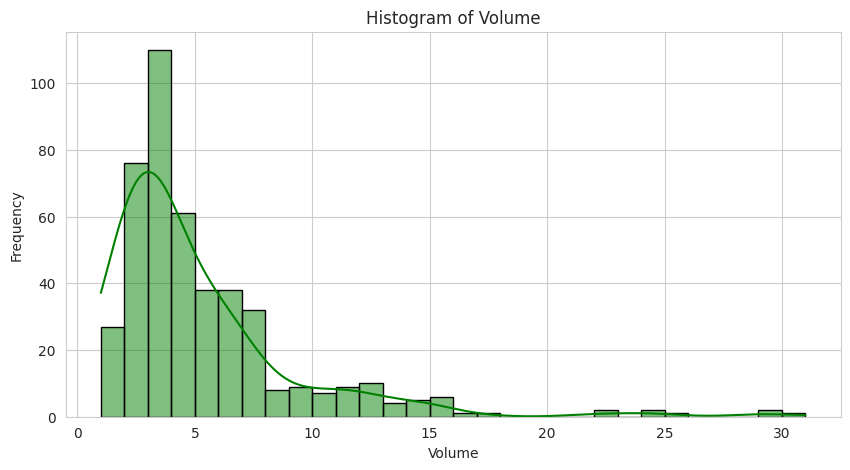

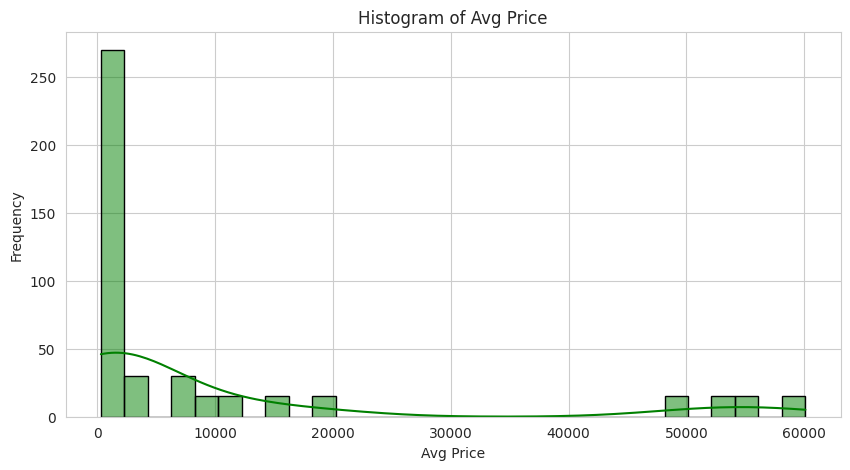

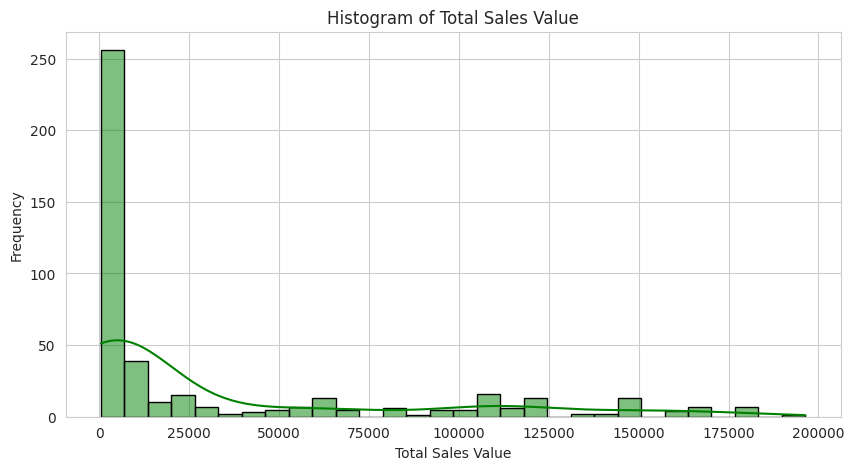

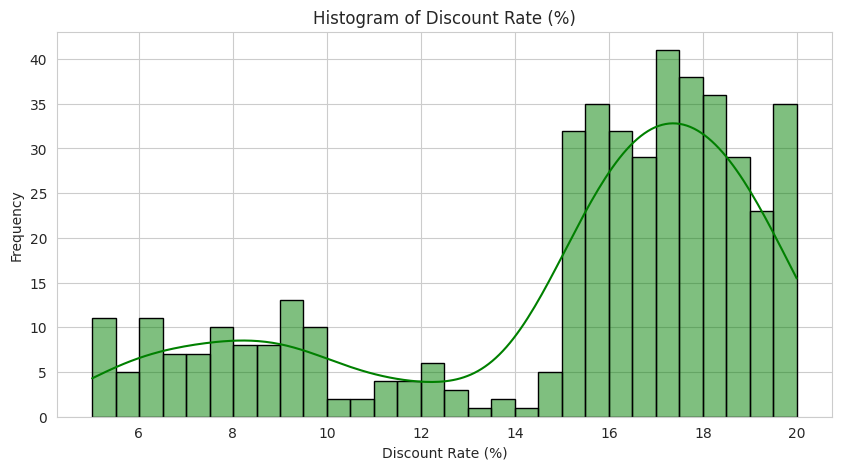

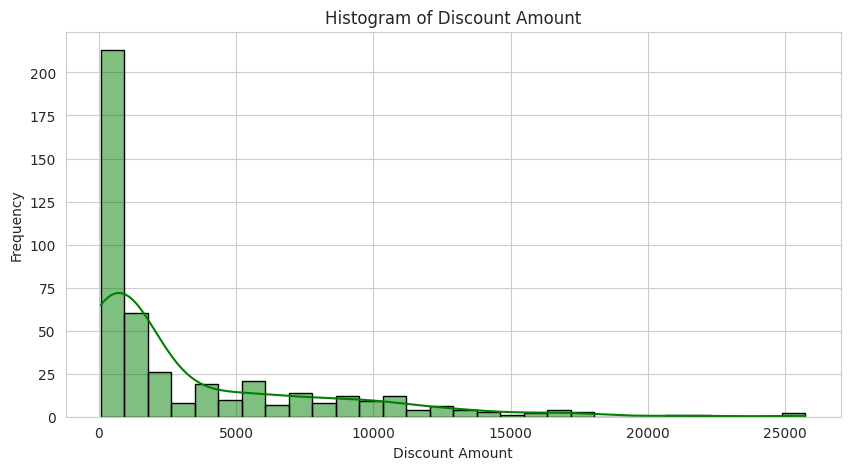

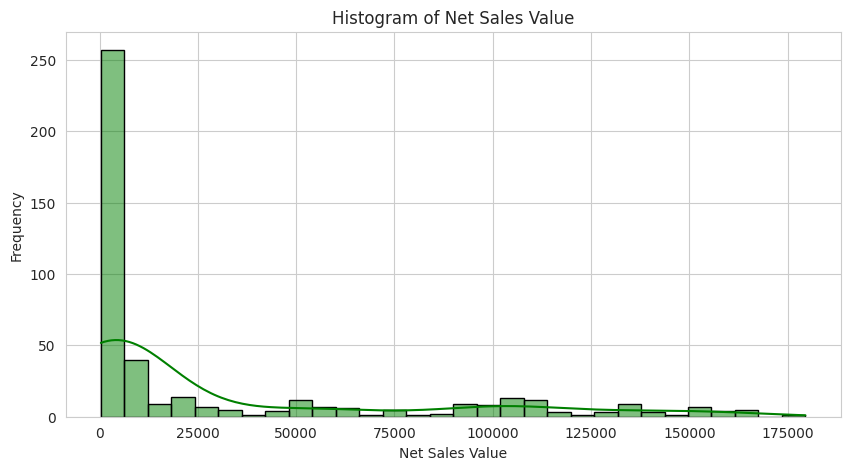

In [17]:
sns.set_style("whitegrid")
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True, bins=30, color='green', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [18]:
col_data = data[column]

print(f"Analysis for {column}:")
print(f"Mean: {col_data.mean():.2f}")
print(f"Median: {col_data.median():.2f}")
print(f"Standard Deviation: {col_data.std():.2f}")
print(f"Skewness: {col_data.skew():.2f}")

# Determine skewness
if col_data.skew() > 1:
    skewness = "highly right-skewed"
elif col_data.skew() < -1:
    skewness = "highly left-skewed"
elif 0.5 < col_data.skew() <= 1:
    skewness = "moderately right-skewed"
elif -1 <= col_data.skew() < -0.5:
    skewness = "moderately left-skewed"
else:
    skewness = "approximately symmetric"

print(f"The distribution is {skewness}.")

Analysis for Net Sales Value:
Mean: 30466.34
Median: 4677.79
Standard Deviation: 46358.66
Skewness: 1.54
The distribution is highly right-skewed.


In [19]:
Q1 = col_data.quantile(0.25)
Q3 = col_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
print(f"Outliers detected: {outliers.count()} outliers")
print(f"Minimum value: {col_data.min()}")
print(f"Maximum value: {col_data.max()}")
print("\n")

Outliers detected: 35 outliers
Minimum value: 326.97480055470817
Maximum value: 179507.47904902254




In [20]:
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("\nNumerical columns identified:")
print(numerical_columns)

print("\nCategorical columns identified:")
print(categorical_columns)


Numerical columns identified:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

Categorical columns identified:
Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


Boxplot

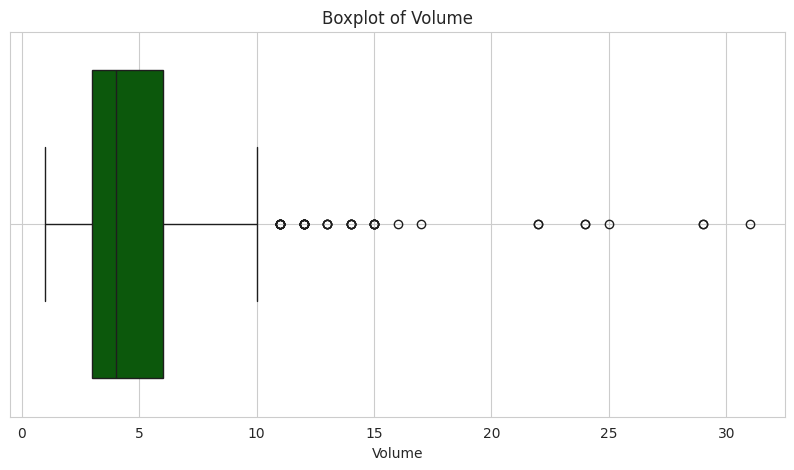

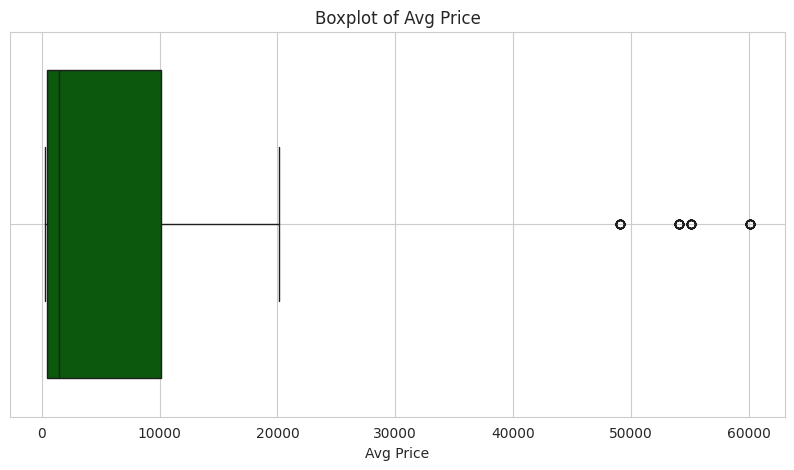

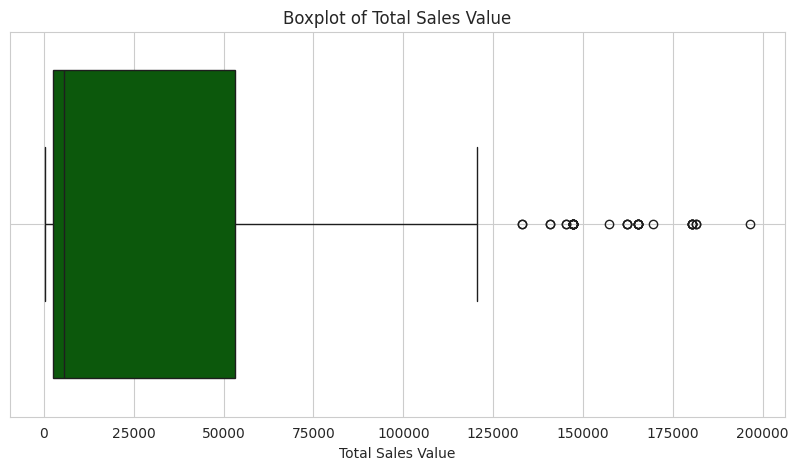

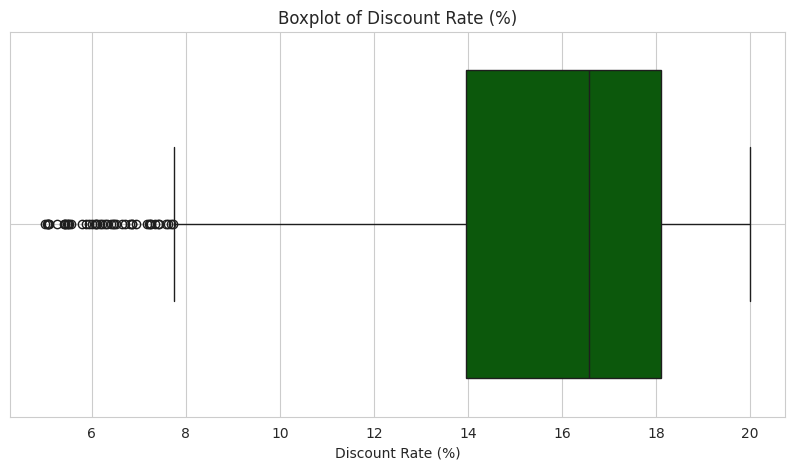

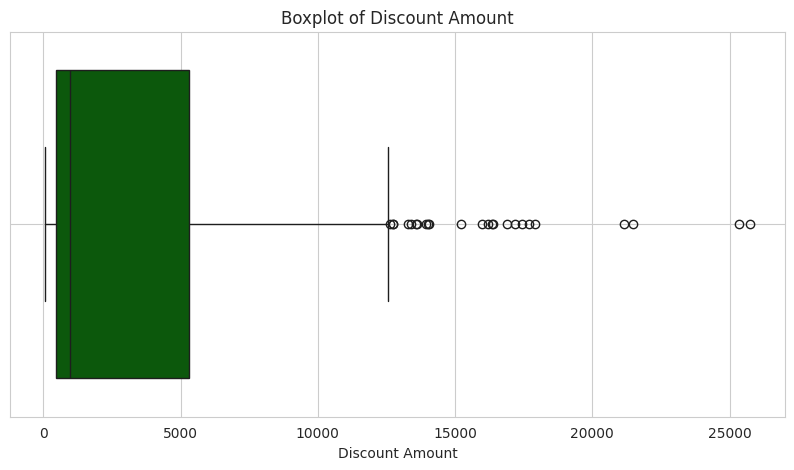

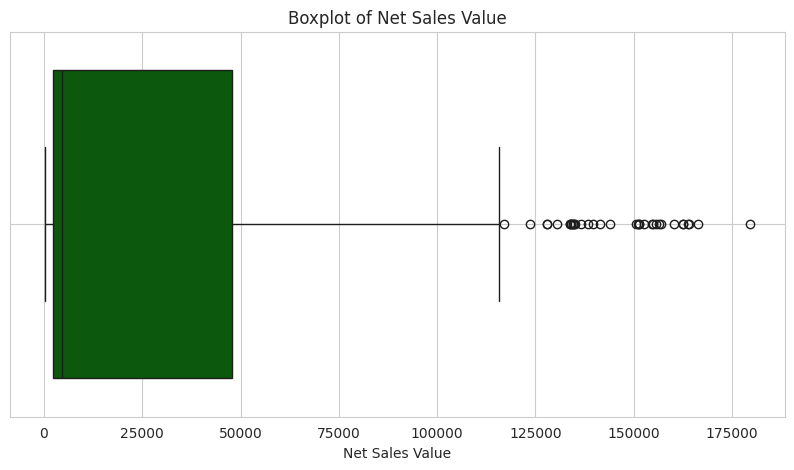

In [22]:
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column], color='darkgreen')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

In [23]:
col_data = data[column]
Q1 = col_data.quantile(0.25)
Q3 = col_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
print(f"Analysis for {column}:")
print(f"Median (Q2): {col_data.median():.2f}")
print(f"First quartile (Q1): {Q1:.2f}")
print(f"Third quartile (Q3): {Q3:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")
print(f"Outliers detected: {outliers.count()} outliers")
if not outliers.empty:
  print(f"Outliers:\n{outliers}")
else:
  print("No outliers detected.")
  print("\n")

Analysis for Net Sales Value:
Median (Q2): 4677.79
First quartile (Q1): 2202.21
Third quartile (Q3): 47847.91
Interquartile Range (IQR): 45645.70
Lower bound for outliers: -66266.35
Upper bound for outliers: 116316.47
Outliers detected: 35 outliers
Outliers:
0      160346.501180
6      133705.960281
9      162399.016267
36     139563.638215
38     151348.339806
39     163915.971000
66     179507.479049
96     134677.496342
126    134731.954625
127    152667.358354
157    151182.489533
180    128021.668141
186    134546.434042
187    150648.927866
188    151300.061501
189    162603.186379
210    144071.775796
216    133691.761681
240    155761.977806
243    130557.833327
246    136485.419091
278    154937.485475
300    123703.324633
306    134934.946692
308    154541.087365
309    163967.080070
338    156895.968772
339    166263.161348
363    127965.990988
366    134024.219259
390    116881.405280
396    133917.772667
420    141315.267719
426    138449.922039
428    156330.969890
Name: 

Barchart

<ipython-input-24-d4a699a709ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


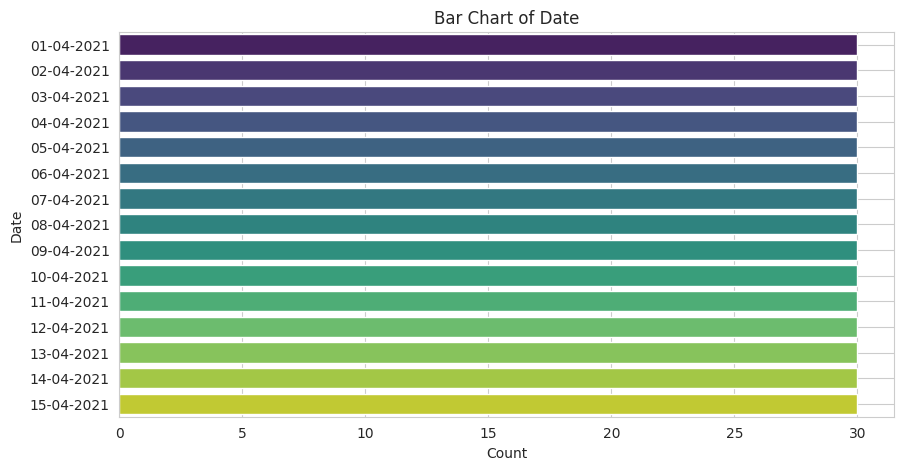

<ipython-input-24-d4a699a709ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


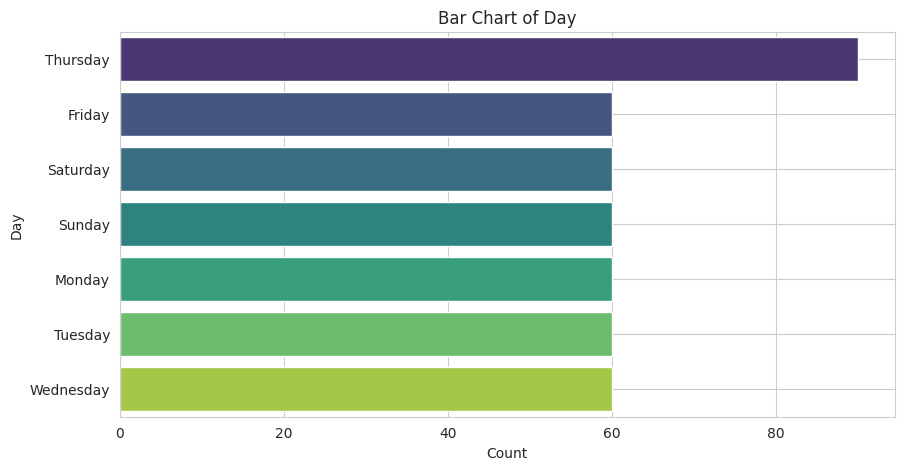

<ipython-input-24-d4a699a709ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


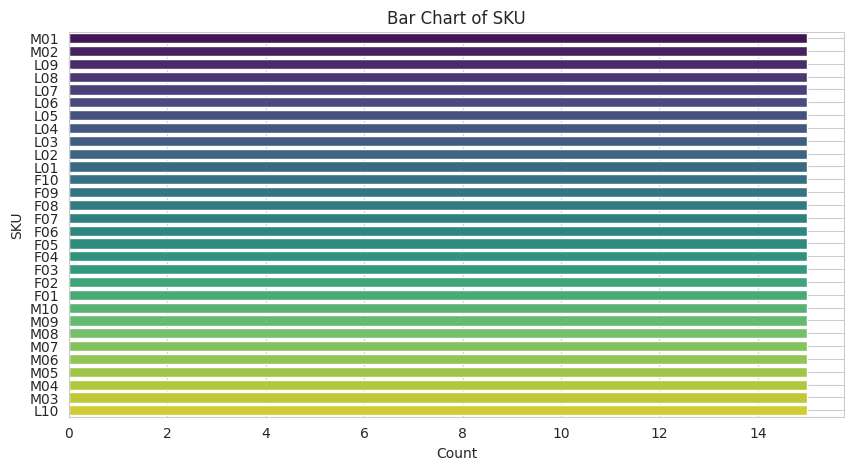

<ipython-input-24-d4a699a709ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


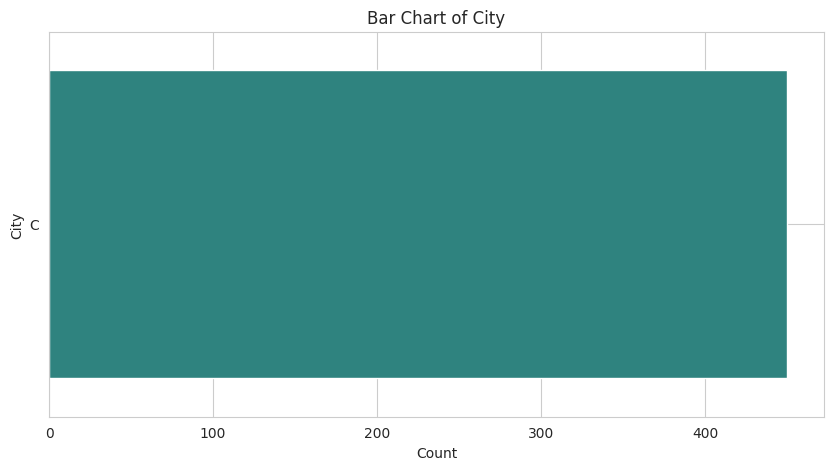

<ipython-input-24-d4a699a709ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


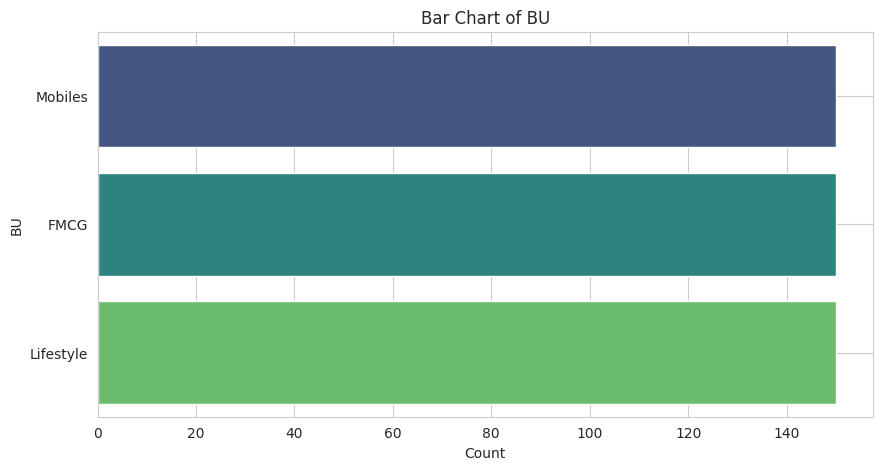

<ipython-input-24-d4a699a709ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


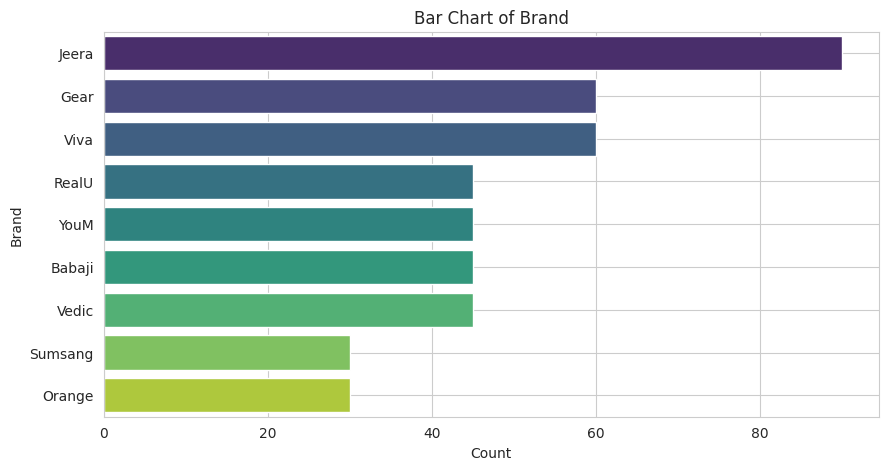

<ipython-input-24-d4a699a709ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')


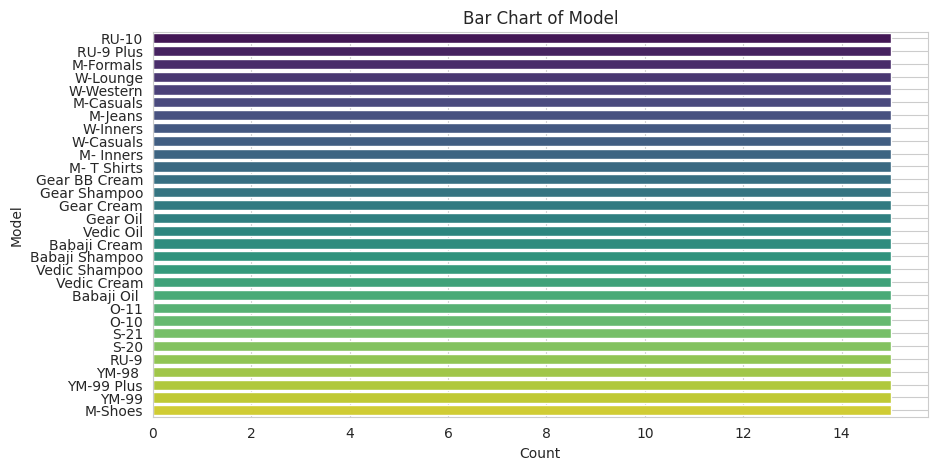

In [24]:
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [25]:
value_counts = data[column].value_counts()
print(f"Analysis for {column}:")
print(f"Number of unique categories: {value_counts.size}")
print(f"Category counts:\n{value_counts}")
print(f"Most frequent category: {value_counts.idxmax()} with {value_counts.max()} occurrences")
print(f"Least frequent category: {value_counts.idxmin()} with {value_counts.min()} occurrences")
print("\n")

Analysis for Model:
Number of unique categories: 30
Category counts:
Model
RU-10             15
RU-9 Plus         15
M-Formals         15
W-Lounge          15
W-Western         15
M-Casuals         15
M-Jeans           15
W-Inners          15
W-Casuals         15
M- Inners         15
M- T Shirts       15
Gear BB Cream     15
Gear Shampoo      15
Gear Cream        15
Gear Oil          15
Vedic Oil         15
Babaji Cream      15
Babaji Shampoo    15
Vedic Shampoo     15
Vedic Cream       15
Babaji Oil        15
O-11              15
O-10              15
S-21              15
S-20              15
RU-9              15
YM-98             15
YM-99 Plus        15
YM-99             15
M-Shoes           15
Name: count, dtype: int64
Most frequent category: RU-10 with 15 occurrences
Least frequent category: RU-10 with 15 occurrences




**Standardization Of Numerical Variables**

In [26]:
numerical_columns = data.select_dtypes(include=['number']).columns
print("\nNumerical columns identified for standardization:")
print(numerical_columns)


Numerical columns identified for standardization:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [27]:
means = data[numerical_columns].mean()
std_devs = data[numerical_columns].std()
print("\nMeans of numerical columns before standardization:")
print(means)
print("\nStandard deviations of numerical columns before standardization:")
print(std_devs)


Means of numerical columns before standardization:
Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Standard deviations of numerical columns before standardization:
Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


In [29]:
standardized_df = data.copy()  # Create a copy to keep the original data intact
standardized_df[numerical_columns] = (data[numerical_columns] - means) / std_devs
print("\nFirst few rows of the standardized dataset:")
print(standardized_df.head())


First few rows of the standardized dataset:
         Date       Day  SKU City    Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C  2.347417  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C  1.165831  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C  0.456880  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C  0.220563  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C -0.488389  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0   0.091072           2.922469          -0.829365         3.948422   
1  -0.019548           1.329516          -0.851714         1.846958   
2   0.312312           1.561038          -1.350129         1.621190   
3   0.533552           1.717365          -1.947555         1.112568   
4  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.54

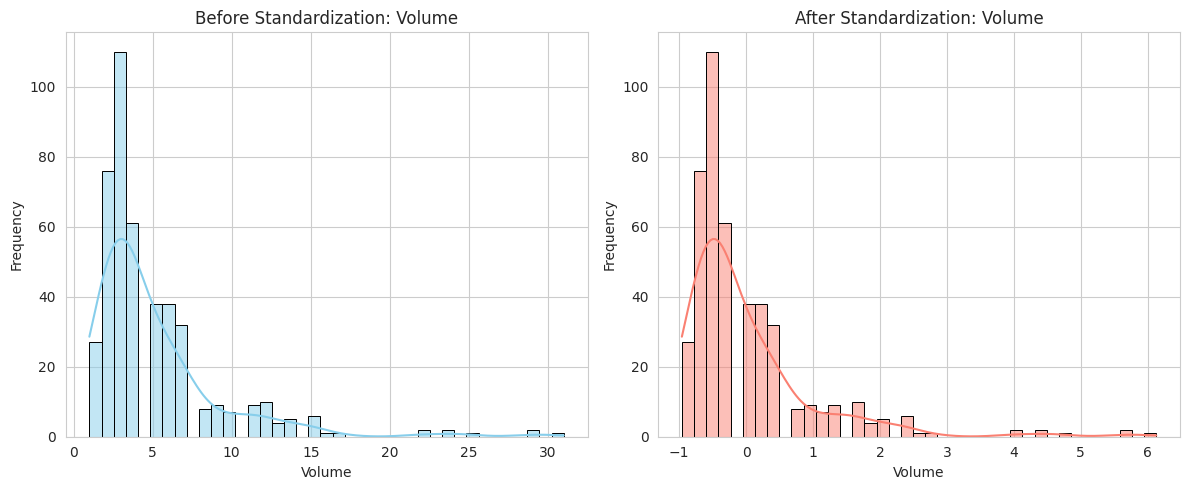


Comparison for Volume:
Before Standardization - Mean: 5.07, Std Dev: 4.23
After Standardization - Mean: 0.00, Std Dev: 1.00



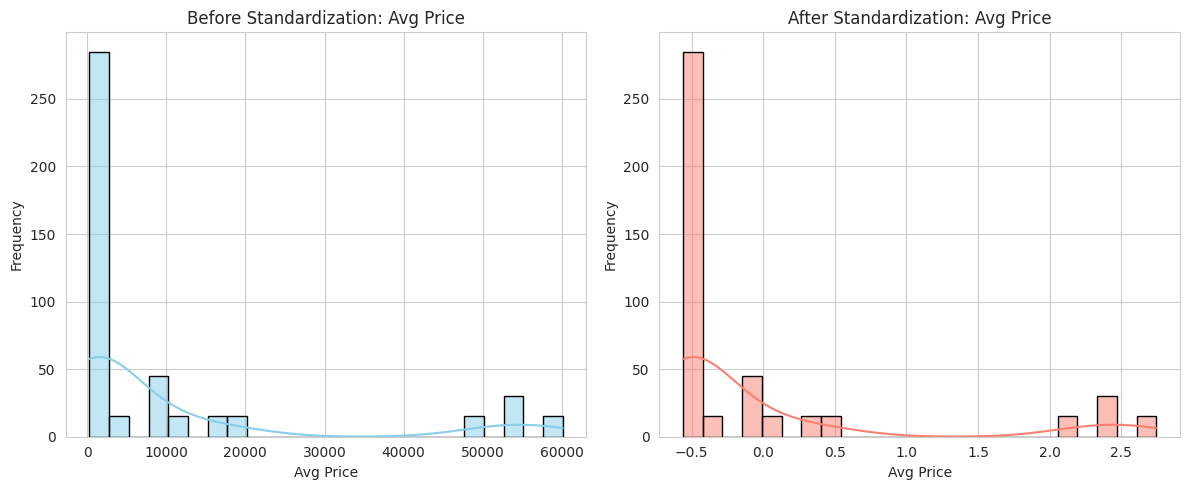


Comparison for Avg Price:
Before Standardization - Mean: 10453.43, Std Dev: 18079.90
After Standardization - Mean: 0.00, Std Dev: 1.00



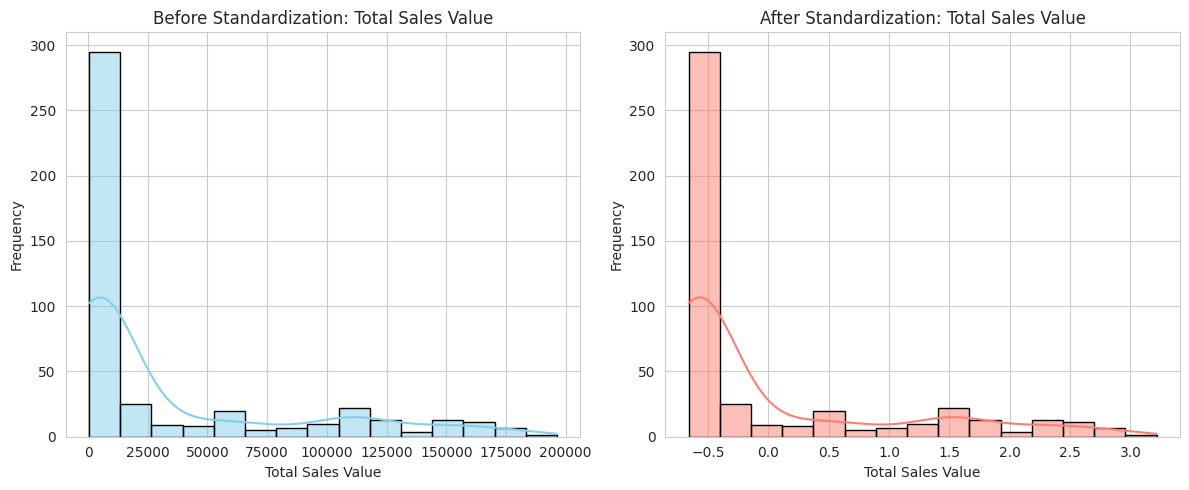


Comparison for Total Sales Value:
Before Standardization - Mean: 33812.84, Std Dev: 50535.07
After Standardization - Mean: 0.00, Std Dev: 1.00



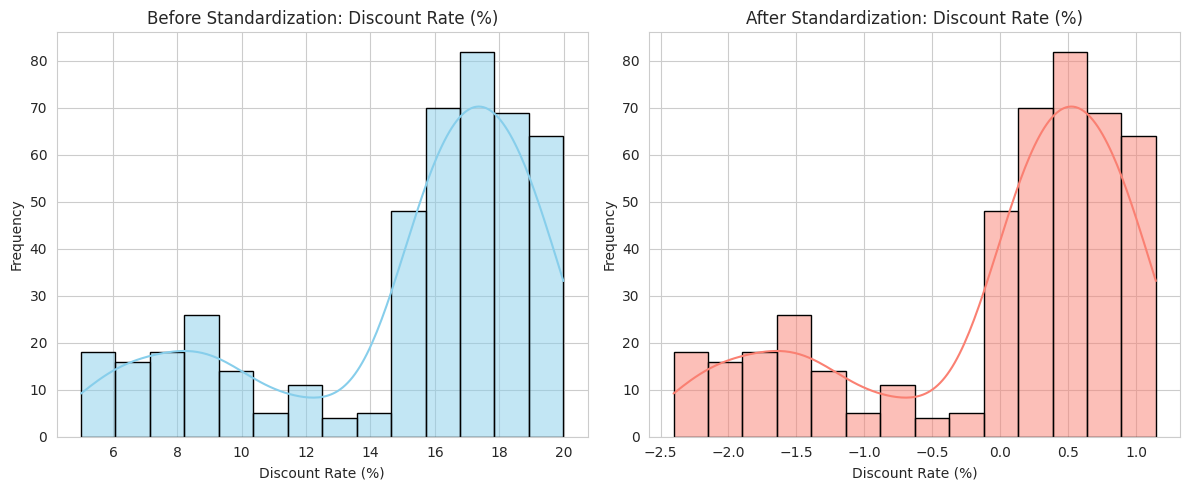


Comparison for Discount Rate (%):
Before Standardization - Mean: 15.16, Std Dev: 4.22
After Standardization - Mean: -0.00, Std Dev: 1.00



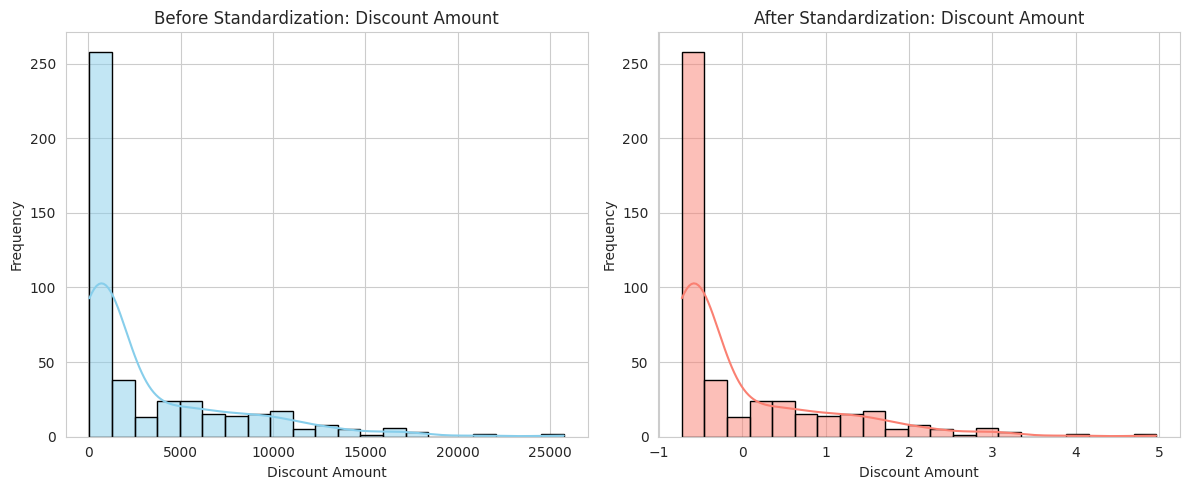


Comparison for Discount Amount:
Before Standardization - Mean: 3346.50, Std Dev: 4509.90
After Standardization - Mean: -0.00, Std Dev: 1.00



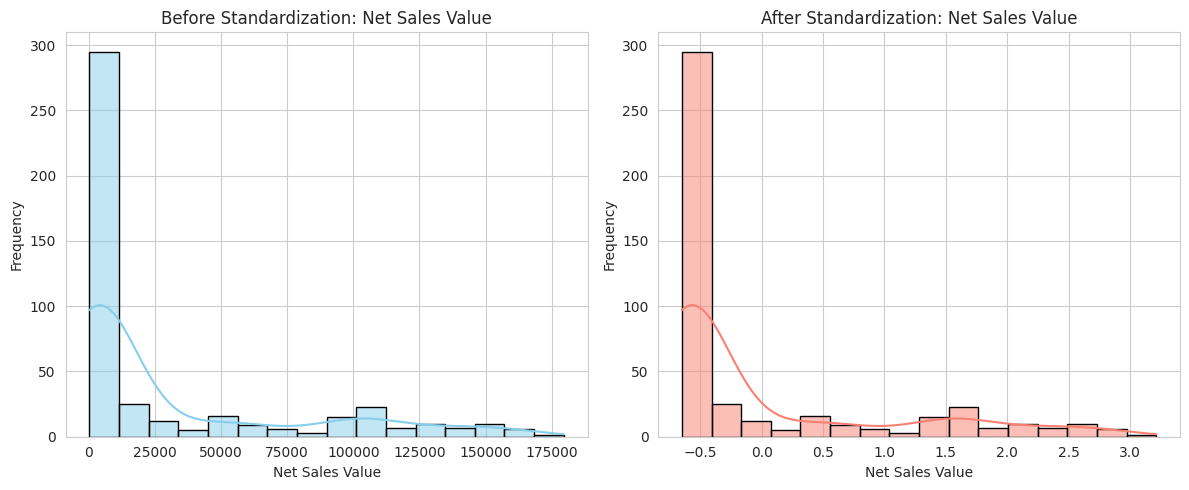


Comparison for Net Sales Value:
Before Standardization - Mean: 30466.34, Std Dev: 46358.66
After Standardization - Mean: 0.00, Std Dev: 1.00



In [30]:
# Compare the distributions before and after standardization
for column in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Before standardization
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Before Standardization: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # After standardization
    plt.subplot(1, 2, 2)
    sns.histplot(standardized_df[column], kde=True, color='salmon', edgecolor='black')
    plt.title(f'After Standardization: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Print basic statistics for comparison
    print(f"\nComparison for {column}:")
    print(f"Before Standardization - Mean: {data[column].mean():.2f}, Std Dev: {data[column].std():.2f}")
    print(f"After Standardization - Mean: {standardized_df[column].mean():.2f}, Std Dev: {standardized_df[column].std():.2f}\n")

**Conversion of Categorial Data into Dummy Variables**

In [31]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns identified for one-hot encoding:")
print(categorical_columns)


Categorical columns identified for one-hot encoding:
Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [32]:
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [33]:
print("\nFirst few rows of the transformed dataset with dummy variables:")
print(data_encoded.head())


First few rows of the transformed dataset with dummy variables:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  .

In [34]:
print("\nColumn names after one-hot encoding:")
print(data_encoded.columns)


Column names after one-hot encoding:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value', 'Date_02-04-2021',
       'Date_03-04-2021', 'Date_04-04-2021', 'Date_05-04-2021',
       'Date_06-04-2021', 'Date_07-04-2021', 'Date_08-04-2021',
       'Date_09-04-2021', 'Date_10-04-2021', 'Date_11-04-2021',
       'Date_12-04-2021', 'Date_13-04-2021', 'Date_14-04-2021',
       'Date_15-04-2021', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'SKU_F02', 'SKU_F03',
       'SKU_F04', 'SKU_F05', 'SKU_F06', 'SKU_F07', 'SKU_F08', 'SKU_F09',
       'SKU_F10', 'SKU_L01', 'SKU_L02', 'SKU_L03', 'SKU_L04', 'SKU_L05',
       'SKU_L06', 'SKU_L07', 'SKU_L08', 'SKU_L09', 'SKU_L10', 'SKU_M01',
       'SKU_M02', 'SKU_M03', 'SKU_M04', 'SKU_M05', 'SKU_M06', 'SKU_M07',
       'SKU_M08', 'SKU_M09', 'SKU_M10', 'BU_Lifestyle', 'BU_Mobiles',
       'Brand_Gear', 'Brand_Jeera', 'Brand_Orange', 'Brand_Re

**Conclusion**

After analyzing and preprocessing the dataset, we can summarize the findings and the importance of each step in a straightforward way.

**Key Findings**

**1. Numerical Data Insights:**

Mean and Median: Show the average and middle values, helping us understand typical data points.

Standard Deviation: Indicates how spread out the data is. Higher values mean more variability.

Histograms: Visualized the distribution of data, showing where most values lie and if there are any extreme values (outliers).

Boxplots: Highlighted data spread and outliers clearly, showing how data is distributed in quartiles.

**2. Categorical Data Insights:**

Bar Charts: Displayed the frequency of each category, helping identify which categories are most or least common.

One-Hot Encoding: Converted categorical values into numerical format, making them usable for machine learning models

**Importance of Data Preprocessing**

**1. Standardization:**

Why?: It scales numerical data to have a mean of 0 and a standard deviation of 1.

Benefit: Ensures all features contribute equally in models, especially those sensitive to scale differences.

**One-Hot Encoding:**

Why?: Converts categories into binary columns (0s and 1s).

Benefit: Allows machine learning algorithms to understand and use categorical data without imposing false relationships between categories.

**Simple Summary Descriptive Analytics:** Gave us a clear picture of the data, showing key statistics and visual patterns.

Standardization: Made numerical data uniform, which is crucial for many machine learning algorithms to perform well.

One-Hot Encoding: Transformed categorical data into a machine-friendly format, enabling its use in models.